In [764]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [765]:
path = r'C:\Users\24729\Desktop\nj_sports\Suning.xlsx'
Suning = pd.read_excel(path, usecols = 'A:K', index_col = '赛季')
del Suning['联赛级别']
Suning
Suning = Suning.rename(columns = {'场次':'game_round','胜':'win','平':'drawn','负':'lose','进球':'goals','失球':'goals_against','净胜球':'goal_difference','积分':'score','排名':'rank'})
del Suning['goal_difference']
Suning = Suning.loc[2009:]

In [766]:
path = r'C:\Users\24729\Desktop\nj_sports\Guoan.xlsx'
Guoan = pd.read_excel(path, skiprows = 1, usecols = 'A:J').rename(columns = {'Unnamed: 0':'赛季'})
Guoan = Guoan.replace('第8名','8').replace('亚军','2').replace('殿军','4').replace('季军','3').replace('第6名','6').replace('第9名','9').replace('第7名','7').replace('冠军','1').replace('第5名','5').replace('第9名','9')
Guoan = Guoan.drop([13,27])
Guoan['赛季'] = Guoan['赛季'].astype('int64')
Guoan = Guoan.set_index('赛季')
del Guoan['联赛组别']
Guoan = Guoan.rename(columns = {'赛':'game_round','胜':'win','平':'drawn','负':'lose','进球':'goals','失球':'goals_against','得分':'score','名次':'rank'})
Guoan = Guoan.loc[2009:2017].astype('int64')
Guoan

,game_round,win,drawn,lose,goals,goals_against,score,rank
赛季,,,,,,,,
2009,30,13,12,5,48,28,51,1
2010,30,12,10,8,35,29,46,5
2011,30,14,11,5,49,21,53,2
2012,30,14,6,10,34,35,48,3
2013,30,14,9,7,54,31,51,3
2014,30,21,4,5,50,25,67,2
2015,30,16,8,6,46,26,56,4
2016,30,11,10,9,34,26,43,5
2017,30,11,7,12,42,42,40,9


In [767]:
path = r'C:\Users\24729\Desktop\nj_sports\Luneng.xlsx'
Luneng = pd.read_excel(path, usecols = 'A:I')
Luneng['顶级联赛'] = Luneng['顶级联赛'].str.replace('第','').replace('冠军','1').replace('亚军','2').replace('季军','3')
Luneng = Luneng.set_index('赛季')
Luneng = Luneng.rename(columns = {'总场次':'game_round','胜':'win','平':'drawn','负':'lose','进球':'goals','失球':'goals_against','折算积分':'score','顶级联赛':'rank'})
Luneng = Luneng.loc[2009:2017]
Luneng

,game_round,win,drawn,lose,goals,goals_against,score,rank
赛季,,,,,,,,
2009,38,13,13,12,46,42,52,4
2010,36,20,9,7,64,42,69,1
2011,39,15,11,13,49,43,56,5
2012,35,10,15,10,55,47,45,12
2013,32,19,5,8,58,37,62,2
2014,43,18,15,10,68,45,69,4
2015,42,23,7,12,91,65,76,3
2016,44,15,12,17,60,59,57,14
2017,34,15,11,8,55,37,56,5


In [768]:
path = r'C:\Users\24729\Desktop\nj_sports\Shenhua.xlsx'
Shenhua = pd.read_excel(path, usecols = 'A:K')
Shenhua = Shenhua.replace('1→无1','1')
Shenhua['赛季'] = Shenhua['赛季'].str.replace('赛季','')
Shenhua = Shenhua.set_index('赛季')
del Shenhua['参赛球队数'], Shenhua['净胜球']
Shenhua = Shenhua.rename(columns = {'名次':'rank','参赛轮次':'game_round','胜':'win','平':'drawn','负':'lose','进球':'goals','失球':'goals_against','积分':'score'})
Shenhua = Shenhua.sort_index().iloc[15:-2]
Shenhua.index = Shenhua.index.astype('int64')
Shenhua

,rank,game_round,win,drawn,lose,goals,goals_against,score
赛季,,,,,,,,
2009,5,30,12,9,9,39,29,45
2010,3,30,14,6,10,44,41,48
2011,11,30,11,4,15,31,41,37
2012,9,30,8,14,8,39,34,38
2013,8,30,11,11,8,36,36,38
2014,9,30,8,11,11,33,45,35
2015,6,30,12,6,12,42,44,42
2016,4,30,12,12,6,46,31,48
2017,11,30,9,8,13,52,55,35


In [769]:
path = r'C:\Users\24729\Desktop\nj_sports\Shanggang.xlsx'
Shanggang = pd.read_excel(path, usecols = 'A:J')
Shanggang = Shanggang.iloc[3:12]
Shanggang['年份'] = Shanggang['年份'].str.replace('年','')
Shanggang = Shanggang.replace('第4名','4').replace('第9名','9').replace('第5名','5').replace('冠军','1').replace('亚军','2').replace('季军','3')
Shanggang.iloc[0] = [2009,'',0,0,0,0,0,0,0,0]
Shanggang.iloc[1] = [2010,'',0,0,0,0,0,0,0,0]
Shanggang.iloc[2] = [2011,'',0,0,0,0,0,0,0,0]
Shanggang.iloc[3] = [2012,'',0,0,0,0,0,0,0,0]
del Shanggang['赛事']
Shanggang = Shanggang.rename(columns = {'年份':'赛季','场次':'game_round','胜':'win','平':'drawn','负':'lose','得球':'goals','失球':'goals_against','积分':'score','名次':'rank'}).set_index('赛季')

In [770]:
path = r'C:\Users\24729\Desktop\nj_sports\Evergrand.xlsx'
Evergrand = pd.read_excel(path, usecols = 'A:L')
del Evergrand['队名'], Evergrand['胜率%']
Evergrand = Evergrand.loc[19:27]
Evergrand.iloc[1] = [2010,'中甲',0,0,0,0,0,0,0,0]
del Evergrand['联赛'], Evergrand['净胜球']
Evergrand = Evergrand.rename(columns = {'场次':'game_round','胜':'win','平':'drawn','负':'lose','进球':'goals','失球':'goals_against','积分':'score'}).set_index('赛季')
Evergrand

,game_round,win,drawn,lose,goals,goals_against,score
赛季,,,,,,,
2009,30,9,10,11,38,38,37
2010,0,0,0,0,0,0,0
2011,30,20,8,2,67,23,68
2012,30,17,7,6,51,30,58
2013,30,24,5,1,78,18,77
2014,30,22,4,4,76,28,70
2015,30,19,10,1,71,28,67
2016,30,19,7,4,62,19,64
2017,30,20,4,6,69,42,64


In [771]:
path = r'C:\Users\24729\Desktop\nj_sports\Taida.xlsx'
Taida = pd.read_excel(path, usecols = 'A:K')
Taida = Taida.loc[15:23].replace('第6名','6').replace('亚军','2').replace('第10名','10').replace('第8名','8').replace('第11名','11').replace('第7名','7').replace('第13名','13')
Taida['年份'] = Taida['年份'].str.replace('年','')
del Taida['联赛'], Taida['名称']
Taida = Taida.rename(columns = {'年份':'赛季','名次':'rank','场次':'game_round','胜':'win','平':'drawn','负':'lose','得球':'goals','失球':'goals_against','积分':'score'}).set_index('赛季')
Taida

,rank,game_round,win,drawn,lose,goals,goals_against,score
赛季,,,,,,,,
2009,6,30,12,9,9,36,29,45
2010,2,30,13,11,6,37,29,50
2011,10,30,8,13,9,37,41,37
2012,8,30,10,10,10,29,30,40
2013,11,30,11,7,12,35,39,34
2014,7,30,10,9,11,41,44,39
2015,13,30,7,10,13,39,46,31
2016,10,30,9,9,12,38,50,36
2017,13,30,8,7,15,30,49,31


In [772]:
path = r'C:\Users\24729\Desktop\nj_sports\Jianye.xlsx'
Jianye = pd.read_excel(path).iloc[15:24]
del Jianye['备注'], Jianye['联赛等级']
Jianye.iloc[4] = [2013,0,0,0,0,0,0]
Jianye = Jianye.rename(columns = {'年份':'赛季','赛':'game_round','胜':'win','平':'drawn','负':'lose','得分':'score','排名':'rank'}).set_index('赛季').astype('int64')
Jianye

,game_round,win,drawn,lose,score,rank
赛季,,,,,,
2009,30,13,9,8,48,3
2010,30,9,13,8,40,8
2011,30,7,11,12,32,13
2012,30,7,5,18,26,16
2013,0,0,0,0,0,0
2014,30,6,12,12,30,14
2015,30,12,10,8,46,5
2016,30,10,5,15,35,13
2017,30,7,9,14,30,14


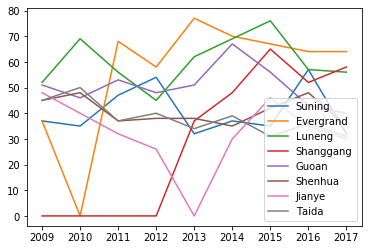

In [773]:
year = np.arange(2009,2018)
plt.figure()
plt.plot(year, Suning['score'],'-', label = 'Suning')
plt.plot(year, Evergrand['score'],'-', label = 'Evergrand')
plt.plot(year, Luneng['score'],'-', label = 'Luneng')
plt.plot(year, Shanggang['score'],'-', label = 'Shanggang')
plt.plot(year, Guoan['score'],'-', label = 'Guoan')
plt.plot(year, Shenhua['score'],'-', label = 'Shenhua')
plt.plot(year, Jianye['score'],'-', label = 'Jianye')
plt.plot(year, Taida['score'],'-', label = 'Taida')
plt.legend()
plt.show()

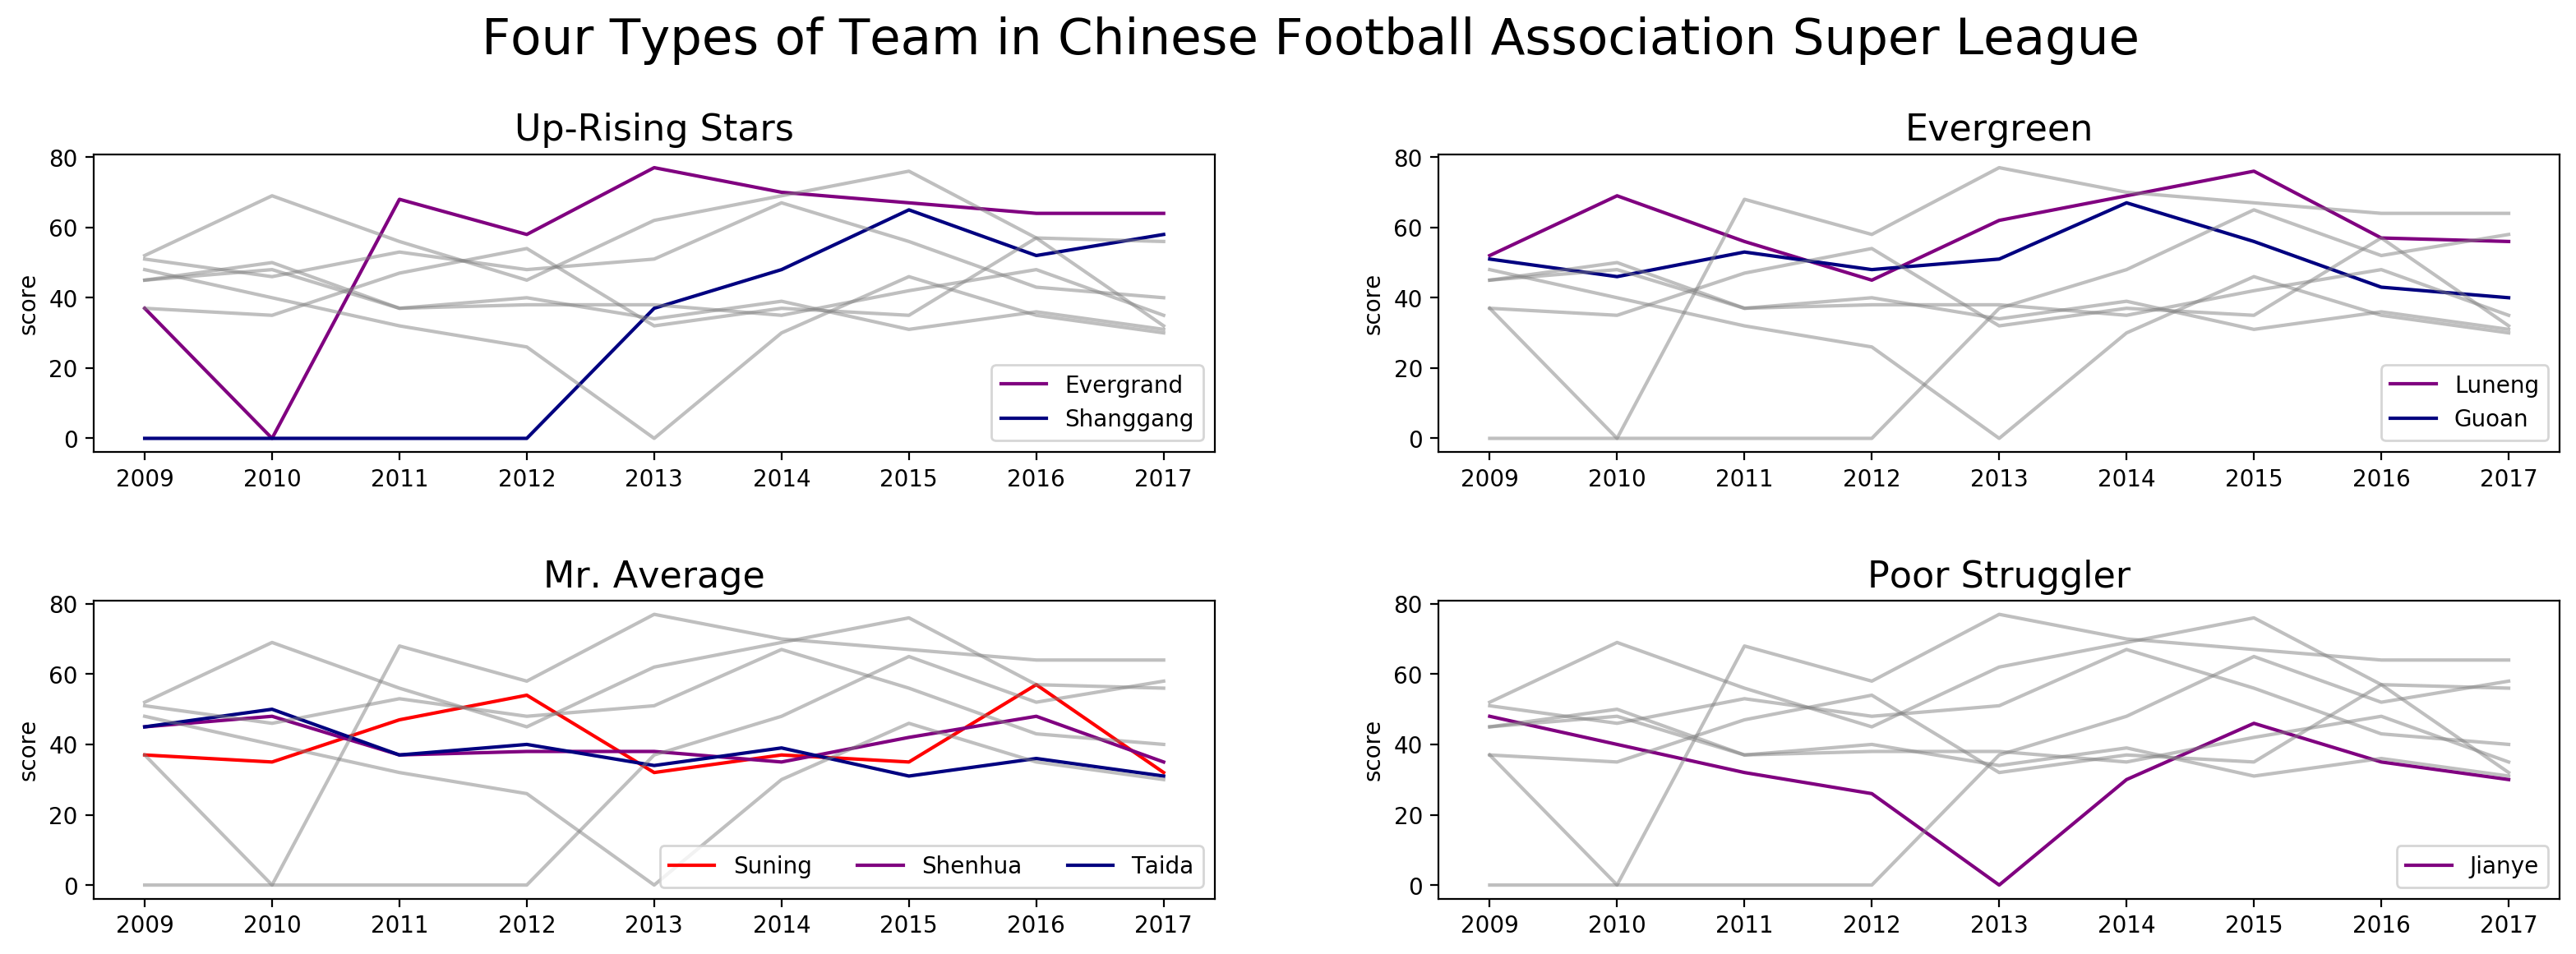

<Figure size 432x288 with 0 Axes>

In [779]:
fig = plt.figure(dpi = 200, figsize = [8,6])

plt.subplots_adjust(hspace = .5,right = 2, wspace = .2)

plt.subplot(2,2,1)
plt.plot(year, Evergrand['score'],'-',c = 'purple', label = 'Evergrand')
plt.plot(year, Shanggang['score'],'-',c = 'navy', label = 'Shanggang')
plt.plot(year, Suning['score'],'-',c = 'gray',  alpha = 0.5)
plt.plot(year, Luneng['score'],'-',c = 'gray',  alpha = 0.5)
plt.plot(year, Guoan['score'],'-', c = 'gray',  alpha = 0.5)
plt.plot(year, Shenhua['score'],'-', c = 'gray',alpha = .5)
plt.plot(year, Jianye['score'],'-', c = 'gray', alpha = .5)
plt.plot(year, Taida['score'],'-', c = 'gray',alpha = .5)
plt.ylabel('score')
plt.legend(loc = 0)
plt.title('Up-Rising Stars', fontsize=16)

plt.subplot(2,2,2)
plt.plot(year, Luneng['score'],'-',c = 'purple', label = 'Luneng')
plt.plot(year, Guoan['score'],'-', c = 'navy',  label = 'Guoan')
plt.plot(year, Evergrand['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Shanggang['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Suning['score'],'-',c = 'gray',  alpha = 0.5)
plt.plot(year, Shenhua['score'],'-', c = 'gray',alpha = .5)
plt.plot(year, Jianye['score'],'-', c = 'gray', alpha = .5)
plt.plot(year, Taida['score'],'-', c = 'gray',alpha = .5)
plt.ylabel('score')
plt.legend(loc = 0)
plt.title('Evergreen', fontsize=16)

plt.subplot(2,2,3)
plt.plot(year, Suning['score'],'-',c = 'red', label = 'Suning')
plt.plot(year, Shenhua['score'],'-', c = 'purple',label = 'Shenhua')
plt.plot(year, Taida['score'],'-', c = 'navy',label = 'Taida')
plt.plot(year, Luneng['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Guoan['score'],'-', c = 'gray',  alpha = 0.5)
plt.plot(year, Evergrand['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Shanggang['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Jianye['score'],'-', c = 'gray', alpha = .5)
plt.ylabel('score')
plt.legend(loc = 0, ncol = 3)
plt.title('Mr. Average', fontsize=16)

plt.subplot(2,2,4)
plt.plot(year, Jianye['score'],'-', c = 'purple', label = 'Jianye')
plt.plot(year, Suning['score'],'-',c = 'gray', alpha = .5)
plt.plot(year, Shenhua['score'],'-', c = 'gray',alpha = .5)
plt.plot(year, Taida['score'],'-', c = 'gray',alpha = .5)
plt.plot(year, Luneng['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Guoan['score'],'-', c = 'gray',  alpha = 0.5)
plt.plot(year, Evergrand['score'],'-',c = 'gray', alpha = 0.5)
plt.plot(year, Shanggang['score'],'-',c = 'gray', alpha = 0.5)
plt.ylabel('score')
plt.legend(loc = 4, ncol = 3)
plt.title('Poor Struggler', fontsize=16)

fig.suptitle('Four Types of Team in Chinese Football Association Super League',x = 1.05,y = 1.02, fontsize = 22)
plt.show()
plt.savefig(r'C:\Users\24729\Desktop\assignment4.jpg')